In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [285]:
happiness_2015_df = pd.read_csv('/Users/sonyasha/pyda_homeworks/EDA/archive/2015.csv')
happiness_2016_df = pd.read_csv('/Users/sonyasha/pyda_homeworks/EDA/archive/2016.csv')
happiness_2017_df = pd.read_csv('/Users/sonyasha/pyda_homeworks/EDA/archive/2017.csv')
happiness_2018_df = pd.read_csv('/Users/sonyasha/pyda_homeworks/EDA/archive/2018.csv')
happiness_2019_df = pd.read_csv('/Users/sonyasha/pyda_homeworks/EDA/archive/2019.csv')

In [286]:
happiness_2015_df.rename(columns={'Happiness Score': 'Score_2015', 'Economy (GDP per Capita)': 'Economy_2015'}, inplace=True)
happiness_2016_df.rename(columns={'Happiness Score': 'Score_2016'}, inplace=True)
happiness_2017_df.rename(columns={'Happiness.Score': 'Score_2017'}, inplace=True)
happiness_2018_df.rename(columns={'Score': 'Score_2018', 'Country or region': 'Country' }, inplace=True)
happiness_2019_df.rename(columns={'Score': 'Score_2019', 'Country or region': 'Country', 'GDP per capita': 'Economy_2019'}, inplace=True)

In [259]:
happiness_2019_df.head(5)

,Overall rank,Country,Score_2019,Economy_2019,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot:>

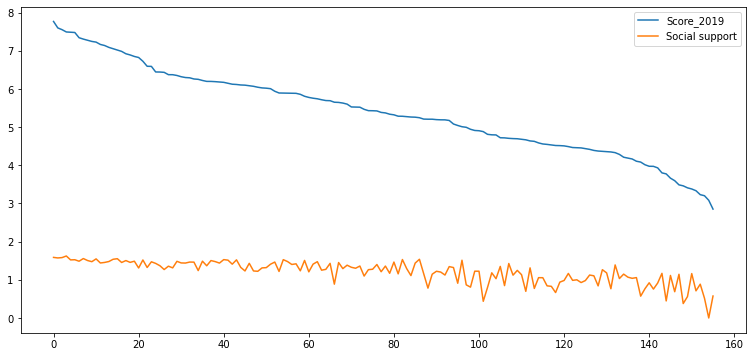

In [287]:
happiness_2019_df[['Score_2019', 'Social support']].plot()

На данном графике можно увидеть долю оценки "социальной поддержки" в общей оценке уровня счастья. Интерес представляет тот факт, что при уменьшении оценки уровня счастья, уровень влияния социальной поддержки в целом сохраняется на одном и том же уровне. На основании этого, можно предположить, что в странах с более низким уровнем счастья, уровень социальной поддержки очень важен для населения. 

In [288]:
happiness_2019_df = happiness_2019_df.merge(happiness_2015_df[['Country', 'Region']], how='left', on='Country')

In [294]:
regions = happiness_2019_df['Region'].value_counts().sort_values(ascending = False).head(5)
regions = list(regions.index)

Region
Central and Eastern Europe         AxesSubplot(0.125,0.125;0.775x0.755)
Latin America and Caribbean        AxesSubplot(0.125,0.125;0.775x0.755)
Middle East and Northern Africa    AxesSubplot(0.125,0.125;0.775x0.755)
Sub-Saharan Africa                 AxesSubplot(0.125,0.125;0.775x0.755)
Western Europe                     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

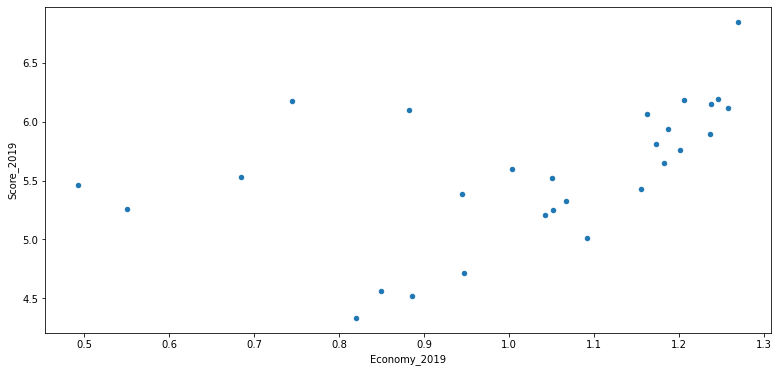

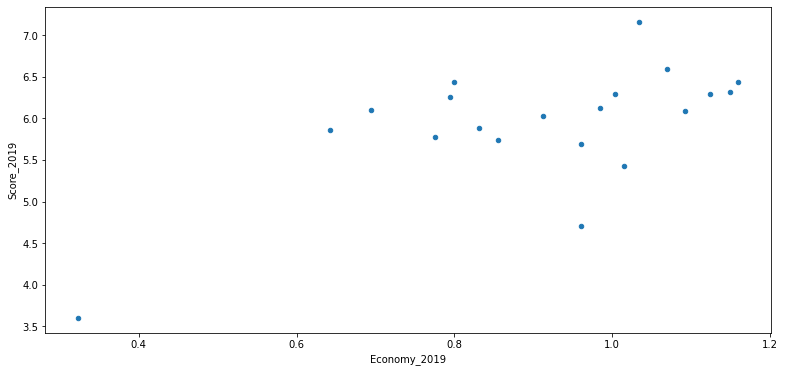

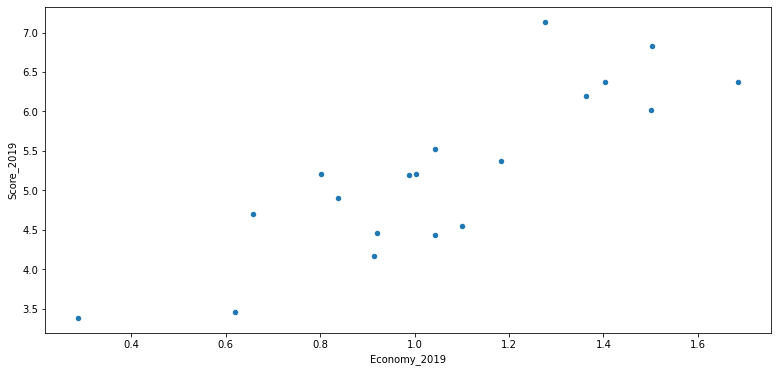

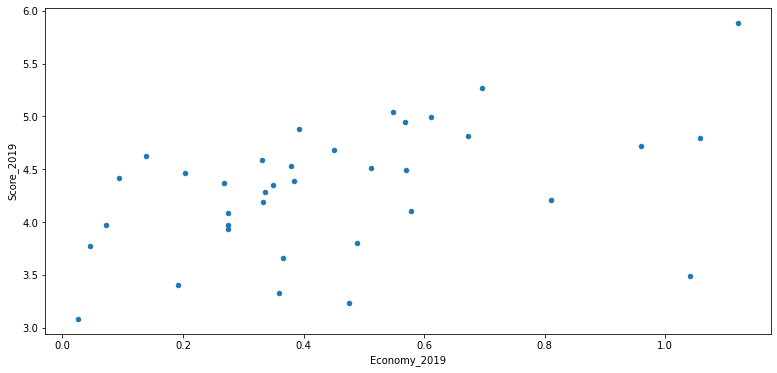

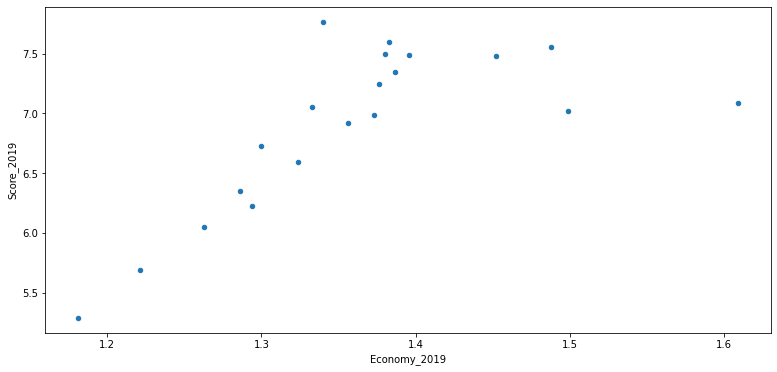

In [318]:
happiness_regions_2019 = happiness_2019_df.loc[happiness_2019_df['Region'].isin(regions)]
happiness_regions_2019.groupby('Region').plot(kind='scatter',
                                              x='Economy_2019',
                                              y='Score_2019')

Данные графики демонстрируют рассеение вляния развития уровня развития экономики на итоговую оценку счастья. Согласно данным графикам можно предложить, что в странах Латинской Америки и Северной Африки оценки находятся на примерно одном уровне и кроме того, экономический фактор оказывает большое влияние на оценку. В то же время в странах Южной Африки при нахождении оценок на примерно одном уровне, влияние экономики на эту оценку неоднозначно. Большой интерес представляет факт, что в странах Западной Европы уровень достатка оказывает большое влияние на оценку счастья, но при достижении отметки в 7 баллов, влияние уменьшяется. Можно предположить, что при достижении некоторого уровня экономики, более важное место начинают занимать другие ценности. 

In [298]:
change_in_scores = happiness_2015_df[['Country', 'Score_2015']].merge(happiness_2016_df[['Country', 'Score_2016']], how='left', on='Country')
change_in_scores = change_in_scores.merge(happiness_2017_df[['Country', 'Score_2017']], how='left', on='Country')
change_in_scores = change_in_scores.merge(happiness_2018_df[['Country', 'Score_2018']], how='left', on='Country')
change_in_scores = change_in_scores.merge(happiness_2019_df[['Country', 'Score_2019']], how='left', on='Country')

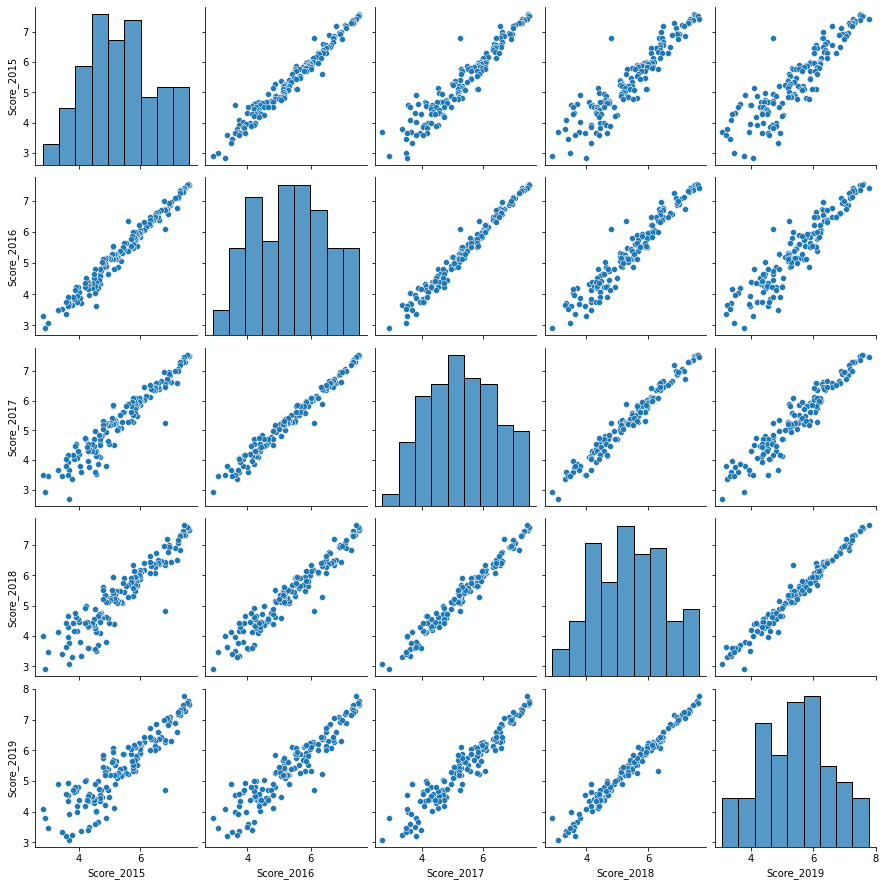

In [236]:
sns.pairplot(change_in_scores[['Score_2015', 'Score_2016', 'Score_2017', 'Score_2018', 'Score_2019']])

По данной визуализации сравнения оценок, полученных в первый и все последующие года между собой, можно предположить, что происходит некоторое выравнивание общего уровня оценок счастья в изучаемых странах. На первой визуализации сравнения оценок за 2015 и 2016 год все точки находятся практически на диагонали, что говорит лишь о малых изменениях в изучаемых странах. На второй визуализации видно, что множество точек рассеивается от биссектриссы в сторону повышения оценки уровня счастья. Однако есть и страны, в которых оценка счастья населением за это время опустилась ниже диагонали, что может свидетельствовать об ухудшении уровня жизни населения. Также большой интерес представляет выброс на втором графике, который соответствует довольно высокой оценке (около 7) в 2015 году и падение ниже 5 в 2019. 

In [213]:
change_in_scores = change_in_scores.merge(happiness_2015_df[['Country', 'Region']], how='left', on='Country')

<AxesSubplot:xlabel='Region', ylabel='Score_2019'>

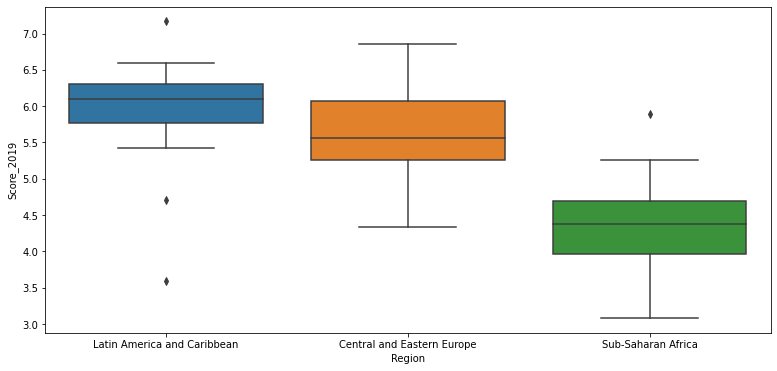

In [224]:
largest_regions = change_in_scores['Region'].value_counts().sort_values(ascending = False).head(3).index.values
sns.boxplot(x="Region", y="Score_2019", 
            data=change_in_scores[change_in_scores['Region'].isin(largest_regions)])

На данной визуализации представлены данные по уровням счастья в отстающих регионах (Центральная и Восточная Европа относится скорее к благополучным и развивающимся и взята для сравнения). Данная визуализация хорошо отражает прогресс в странах Латинской Америки по сравнению со странами Центральной и Южной Африки. Интересны также имеющиеся на графиках выбросы. В случае Латинской Америки можно предположить, что 2 страны, получившие низкие оценки это авторитарные государства, в которых начались народные волнения (например, Аргентина), в то же время выбросы в более высокий уровень могут свидетельствовать о наличии регионов, совершивших резкий скачок в развитии. 